In [3]:
!pip3 install wordcloud
!pip3 install tweepy
!pip3 install TextBlob
!pip3 install jsonpickle

In [2]:
import time
import tweepy
from textblob import TextBlob
import sys
import re
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

#Variables that contains the user credentials to access Twitter API 
accesstoken = "11111111111111"
accesstoken_secret = "1111111111111111111111"
consumerkey = "11111111111111"
consumersecret = "11111111111111111111"

auth = tweepy.OAuthHandler(consumer_key=consumerkey, consumer_secret=consumersecret)
auth.set_access_token(accesstoken, accesstoken_secret )
api = tweepy.API(auth)

In [3]:
import sys
import jsonpickle
import os

searchQuery = '"#apple" OR "#Macbook" '       # this is what we're searching for

maxTweets = 15000 # Some arbitrary large number
tweetsPerQry = 100  # this is the max the API permits
fName = 'tweets.txt' # We'll store the tweets in a text file.

# If results from a specific ID onwards are reqd, set since_id to that ID.
# else default to no lower limit, go as far back as API allows
sinceId = None

# If results only below a specific ID are, set max_id to that ID.
# else default to no upper limit, start from the most recent tweet matching the search query.
max_id = -1
alltweets=[]
tweetCount = 0
print("Downloading max {0} tweets".format(maxTweets))
with open(fName, 'w') as f:
    while tweetCount < maxTweets:
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.search(q=searchQuery,lang='en',count=tweetsPerQry)
                else:
                    new_tweets = api.search(q=searchQuery,lang='en', count=tweetsPerQry,
                                            since_id=sinceId)
            else:
                if (not sinceId):
                    new_tweets = api.search(q=searchQuery,lang='en', count=tweetsPerQry,
                                            max_id=str(max_id - 1))
                else:
                    new_tweets = api.search(q=searchQuery,lang='en', count=tweetsPerQry,
                                            max_id=str(max_id - 1),
                                            since_id=sinceId)
            if not new_tweets:
                print("No more tweets found")
                break
            # save most recent tweets
            alltweets.extend(new_tweets)
            for tweet in new_tweets:               
                f.write(jsonpickle.encode(tweet._json) +
                        '\n')
            tweetCount += len(new_tweets)
            print("Downloaded {0} tweets".format(tweetCount))
            max_id = new_tweets[-1].id
        except tweepy.TweepError as e:
            # Just exit if any error
            print("some error : " + str(e))
            break

print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fName))

Downloaded 83 tweets
Downloaded 153 tweets
Downloaded 245 tweets
Downloaded 338 tweets
Downloaded 434 tweets
Downloaded 522 tweets
Downloaded 610 tweets
Downloaded 693 tweets
Downloaded 778 tweets
Downloaded 874 tweets
Downloaded 967 tweets
Downloaded 1033 tweets
Downloaded 1033 tweets, Saved to tweets.txt


In [75]:
from textblob import TextBlob

tweets = pd.DataFrame()
tweets['tweetID'] = [tweet.id for tweet in alltweets]
tweets['time']=[tweet.created_at for tweet in alltweets]
tweets['text'] = [tweet.text for tweet in alltweets]
# remove duplicates later
tweets['Sentiment'] = [TextBlob(tweet.text).polarity for tweet in alltweets]
tweets['Location'] = [tweet.geo for tweet in alltweets]

In [77]:
# remove http(s) linkes and other extra stuff from tweets 
df1= tweets
iter = 0
while iter < len(tweets)-1:
    #result = re.sub(r"http\S+", "", df1['text'][iter])
    result2= ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweets['text'][iter]).split())
    df1['text'][iter]=result2
    iter += 1
print(df1)

C:\Users\KomakiMohamed\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


                  tweetID                time  \
0     1054552274708631558 2018-10-23 01:57:09   
1     1054551980797018112 2018-10-23 01:55:59   
2     1054551870960779264 2018-10-23 01:55:33   
3     1054551605796847616 2018-10-23 01:54:30   
4     1054550998285336576 2018-10-23 01:52:05   
5     1054550948553650176 2018-10-23 01:51:53   
6     1054550859445690368 2018-10-23 01:51:32   
7     1054550671683280896 2018-10-23 01:50:47   
8     1054550496093130752 2018-10-23 01:50:05   
9     1054550479684988928 2018-10-23 01:50:01   
10    1054550402153283585 2018-10-23 01:49:43   
11    1054550085755797504 2018-10-23 01:48:27   
12    1054550043984769024 2018-10-23 01:48:17   
13    1054549990075297792 2018-10-23 01:48:04   
14    1054549480983298050 2018-10-23 01:46:03   
15    1054549240251174912 2018-10-23 01:45:06   
16    1054549223230844928 2018-10-23 01:45:02   
17    1054549055903330304 2018-10-23 01:44:22   
18    1054548988555288576 2018-10-23 01:44:06   
19    10545486370474

In [78]:
# remove duplicated 
df1 = tweets.drop_duplicates(subset=['text'])
df1.reset_index(drop=True)
print(df1)

                  tweetID                time  \
0     1054552274708631558 2018-10-23 01:57:09   
1     1054551980797018112 2018-10-23 01:55:59   
2     1054551870960779264 2018-10-23 01:55:33   
3     1054551605796847616 2018-10-23 01:54:30   
4     1054550998285336576 2018-10-23 01:52:05   
5     1054550948553650176 2018-10-23 01:51:53   
6     1054550859445690368 2018-10-23 01:51:32   
7     1054550671683280896 2018-10-23 01:50:47   
8     1054550496093130752 2018-10-23 01:50:05   
9     1054550479684988928 2018-10-23 01:50:01   
10    1054550402153283585 2018-10-23 01:49:43   
11    1054550085755797504 2018-10-23 01:48:27   
12    1054550043984769024 2018-10-23 01:48:17   
13    1054549990075297792 2018-10-23 01:48:04   
14    1054549480983298050 2018-10-23 01:46:03   
15    1054549240251174912 2018-10-23 01:45:06   
16    1054549223230844928 2018-10-23 01:45:02   
17    1054549055903330304 2018-10-23 01:44:22   
18    1054548988555288576 2018-10-23 01:44:06   
19    10545486370474

In [35]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [93]:
# source of classification
# https://pythonspot.com/python-sentiment-analysis/
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
def word_feats(words):
    return dict([(word, True) for word in words])
prod_vocab = ['new','product', 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)', 'bad', 'terrible','useless', 'hate', ':(' ]
Sup_Chain = ['late','pay' ]
CRM = [ 'phone','call','sound','customers', 'user', 'users','crm','employe', 'service' ]
#Other
prod_vocab_features = [(word_feats(Product), 'Product') for Product in prod_vocab]
#print(prod_vocab_features)
Sup_Chain_features = [(word_feats(Supply_Chain), 'Supply_Chain') for Supply_Chain in Sup_Chain]

CRM_features = [(word_feats(Customer_relation), 'Customer_relation') for Customer_relation in CRM]
#print(CRM_features) 
train_set = prod_vocab_features + Sup_Chain_features + CRM_features
 
classifier = NaiveBayesClassifier.train(train_set) 



['that', 'was', 'very', 'bad', 'product']
Neg
Pos
Pos
Neg
Pos


In [97]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, words, names
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from gensim import models, corpora
ps = PorterStemmer()
stopWords = set(stopwords.words('english'))
stopWords.update(['RT','via'])
df1['MainTopic'] = None
df1['CommentType'] = None
df1.reset_index(drop=True)

for count in df1.index :
    word_tokens = word_tokenize(df1['text'][count])
    filtered_tweet = [ps.stem(w).lower() for w in word_tokens if w not in stopWords]
    dict_tokens = corpora.Dictionary([filtered_tweet])
    doc_term_mat = [dict_tokens.doc2bow(token) for token in [filtered_tweet]]
    num_topics = 1
    
     # Generate the LDA model 
    ldamodel = models.ldamodel.LdaModel(doc_term_mat, 
            num_topics=num_topics, id2word=dict_tokens, passes=2)
    num_words = 5
    
    for item in ldamodel.print_topics(num_topics=num_topics, num_words=num_words):
        list_of_strings = item[1].split(' + ')

    TopWords=[]
    for text in list_of_strings:
        word = text.split('*')[1]
        TopWords.append(word)    
    
    Product = 0
    Supply_Chain = 0
    Customer_relation = 0
    Other = 0 
    for word in TopWords:
        classResult = classifier.classify( word_feats(word))
        print(classResult)
        if classResult == 'Product':
            Product += 1
        elif classResult == 'Supply_Chain':
            Supply_Chain += 1
        elif classResult == 'Customer_relation':
            Customer_relation += 1
        else:
            Other += 1  
    Rep_values = [Product,Supply_Chain,Customer_relation,Other] 
    Rep_ValuesDes = ['Product','Supply_Chain','Customer_relation','Other'] 
    A_max= max(Rep_values)
    Repeated_Item = Rep_values.count(A_max)
    if Repeated_Item == 1:
        topic = Rep_ValuesDes[Rep_values.index(A_max)]
    else:  # two or more topics are repeated
        topic = []
        position = [i for i,x in enumerate(Rep_values) if x == A_max]
        for x in position:
            topic.append(Rep_ValuesDes[x])
    df1['MainTopic'][count] = topic
    if df1['Sentiment'][count] > 0:
        df1['CommentType'][count] = 'pos'
    elif df1['Sentiment'][count]<0:
        df1['CommentType'][count] = 'neg'
    else:
        df1['CommentType'][count] = 'Neutral'

# Save the results into output Excel file
writer = pd.ExcelWriter('output.xlsx')
df1.to_excel(writer,'Sheet1')
writer.save()

C:\Users\KomakiMohamed\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\KomakiMohamed\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\KomakiMohamed\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

0
RT Spoke with John Brandon former Apple Vice President about relationships What do you think godbless positivevibes http
Customer_relation
Customer_relation
Customer_relation
Product
Customer_relation
1
2 in 1 iPhone and Apple Watch wireless charging stand iphone iPhoneXSMax apple


C:\Users\KomakiMohamed\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\KomakiMohamed\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Customer_relation
Supply_Chain
Product
Product
Product
2
China Consumer Association Urges Apple to Compensate Consumers after ID Thefts
Customer_relation
Customer_relation
Product
Product
Supply_Chain
3
You can t go wrong with these fall flavors in your kombucha apple turmeric carrot spices fallishere gtskomb
Customer_relation
Product
Product
Customer_relation
Customer_relation
4
TechnologySecurity 10nm 7nm Apple Bitcoinmining Samsung Begins 7nm Chip Production Easing Miner Demand for Im
Customer_relation
Customer_relation
Product
Customer_relation
Product
5
Apple carrot tomato beet fig soup choysum beef stifry for mom I drink
Product
Product
Product
Customer_relation
Customer_relation


C:\Users\KomakiMohamed\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


6
RT ScienceProject We re on iTunes AND APPLE MUSIC Queue us up and enjoy music newmusic n
Customer_relation
Customer_relation
Product
Customer_relation
Customer_relation
7
Chinese chips hack Apple amp Microsoft computers
Customer_relation
Customer_relation
Product
Supply_Chain
Customer_relation
8
We re on iTunes AND APPLE MUSIC Queue us up and enjoy music newmusic
Customer_relation
Customer_relation
Customer_relation
Customer_relation
Product


C:\Users\KomakiMohamed\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


9
Somebody just posted a new Shortcut on ShareShortcuts NCAA Men s Hoops Top 25 Scores
Customer_relation
Customer_relation
Product
Customer_relation
Customer_relation
10
It s my dream to have use one of my photos I ve taken for Shot on iphone apple shotoniphone
Customer_relation
Customer_relation
Product
Customer_relation
Product
11
nofilter because nature s natural goodness and colors are amazing smoothie made with beets carrots celery
Product
Product
Customer_relation
Product
Product
12
Thanks for clearing that up Siri apple applehelp Sirisucks
Supply_Chain
Supply_Chain
Customer_relation
Customer_relation
Customer_relation
13
Apple Watch series 4 is perfect Apple watch cook
Supply_Chain
Product
Product
Customer_relation
Product
14
RT tea If you want something you ve never had You have to do something you ve never done Oliveleaf Apple tea
Customer_relation
Customer_relation
Product
Supply_Chain
Product
15
Old school Apple pastry from Newtown Maple leaves I Autumn ps I went to Newtown 

In [ ]:
# remove marketing 

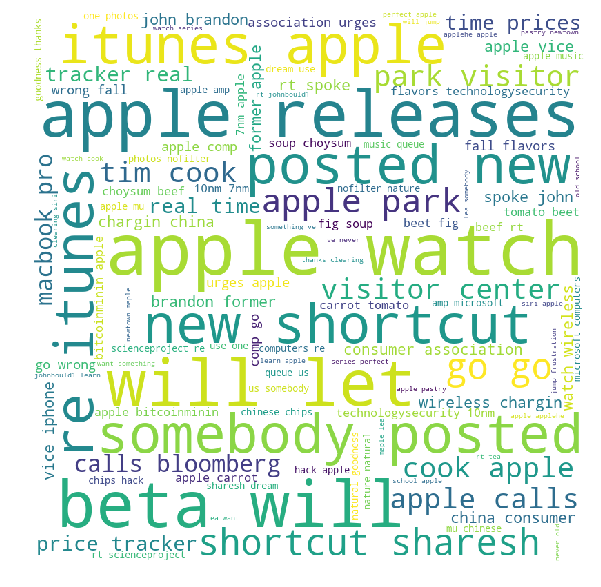

In [100]:
# Plotting Word Cloud for all tweets
Alltext = []
for tweet in df1:
    Alltext.append(' '+ str(df1['text']) + ' ')
    
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS) 
stopwords.update(["http", "https", "Co"])
for val in Alltext: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens:
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 